<h1>Wrangle and Analyze Data</h1>

## Gathering Data

In [91]:
#Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import json
import requests
import tweepy
import os
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Arquivo WeRateDogs
df_we_rate_dogs = pd.read_csv("twitter-archive-enhanced.csv")

In [31]:
#Arquivo image-predictions
folder_name= os.path.dirname(os.path.realpath('wrangle_act.ipynb'))
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [76]:
#Consultando dados do Twitter
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

lista_ids_deletados = []

start = time.time()
print("Activity Started")
for tweet_id in df_we_rate_dogs.tweet_id:
    try:
        tweet = api.get_status(tweet_id)
        #print("Número de likes: " + str(tweet.favorite_count))
        #print("Número de retweets: " + str(tweet.retweet_count))
        with open('tweet_json.txt', 'a') as f:
            f.write(str(tweet_id) + ' ' + str(tweet.retweet_count) + ' ' + str(tweet.favorite_count) + '\n')
    except Exception as e:
        print('Deu erro no id: ' + str(tweet_id))
        lista_ids_deletados.append(str(tweet_id))
end = time.time()
print("Activity Finished")

Activity Started
Deu erro no id: 888202515573088257
Deu erro no id: 873697596434513921
Deu erro no id: 872668790621863937
Deu erro no id: 869988702071779329
Deu erro no id: 866816280283807744
Deu erro no id: 861769973181624320
Deu erro no id: 845459076796616705
Deu erro no id: 842892208864923648
Deu erro no id: 837012587749474308
Deu erro no id: 827228250799742977
Deu erro no id: 802247111496568832
Deu erro no id: 775096608509886464
Deu erro no id: 771171053431250945
Deu erro no id: 771136648247640064
Deu erro no id: 771004394259247104
Deu erro no id: 770743923962707968
Deu erro no id: 754011816964026368


Rate limit reached. Sleeping for: 550


Deu erro no id: 678023323247357953
Activity Finished


In [3]:
#Carregando o arquivo com as previsões de imagem
df_image_prediction = pd.read_csv('image-predictions.tsv', sep='\t')

In [4]:
#Carregando o arquivo com os dados de retweet e favorite
df_retweet_favorite = pd.read_csv("tweet_json.txt", sep=' ', header=None)
df_retweet_favorite.columns = ["tweet_id", "retweet_count", "favorite_count"]

## Assessing Data

In [6]:
df_we_rate_dogs

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
df_image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [8]:
df_retweet_favorite

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8347,38152
1,892177421306343426,6170,32718
2,891815181378084864,4082,24636
3,891689557279858688,8491,41489
4,891327558926688256,9184,39662
5,891087950875897856,3058,19915
6,890971913173991426,2028,11641
7,890729181411237888,18528,64374
8,890609185150312448,4197,27359
9,890240255349198849,7252,31399


In [9]:
df_we_rate_dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
df_image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
df_retweet_favorite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2338 entries, 0 to 2337
Data columns (total 3 columns):
tweet_id          2338 non-null int64
retweet_count     2338 non-null int64
favorite_count    2338 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [15]:
df_we_rate_dogs.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
df_image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [17]:
df_retweet_favorite.describe()

,tweet_id,retweet_count,favorite_count
count,2.338000e+03,2338.000000,2338.000000
mean,7.422116e+17,2944.191617,7994.135586
std,6.836180e+16,4953.949360,12368.854933
min,6.660209e+17,0.000000,0.000000
25%,6.783509e+17,593.250000,1380.500000
50%,7.185770e+17,1374.500000,3481.500000
75%,7.987010e+17,3432.750000,9783.000000
max,8.924206e+17,83920.000000,164676.000000


#### Quality
##### `we rate dogs` table
- Missing "in reply" information (in_reply_to_status_id, in_reply_to_user_id)
- Missing "retweeted" information (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)
- Missing "expanded url"information (expanded_urls)
- Erroneous datatypes (retweeted_status_timestamp, timestamp)
- Records with 'tweet_id' deleted (2356 vs. 2338 in retweet_favorite_count table)
- As one of the 'main keys' inform that only original rating with image matters, some records should be disregarded (2356 vs. 2075 in image_prediction table).
- Incorrect values in 'name' column

##### `image_prediction` table
- Erroneous datatypes (p1, p2, p3, img_num)
- Lowercase (p1, p2, p3)
- Nan values (retweet_count and favorite_count columns) in image_prediction merged table

##### `retweet_favorite_count` table
- As one of the 'main keys' inform that only original rating with image matters, some records should be disregarded (2338 vs. 2075 in image_prediction table).

#### Tidiness
- tweet_id column in `retweet_favorite_count` table is duplicated in `we rate dogs` and `image_prediction` tables
- rating_denominator column in `we rate dogs` table has almost only one value (10). It isn't necessary.
- doggo, floofer, pupper and puppo columns should become one column named phase. Those columns are actually categorical values.
- expand_urls and tweet_id columns in `we rate dogs` have the same information.

## Cleaning Data

### Missing Data

In [113]:
#Copiando os data frames para realizar a limpeza
df_we_rate_dogs_copy = df_we_rate_dogs.copy()
df_image_prediction_copy = df_image_prediction.copy()
df_retweet_favorite_copy = df_retweet_favorite.copy()

#### `treatments`: Missing "in reply", "retweeted" and "expanded_urls "information

##### Define
Drop information regarding 'in_reply' and 'retweeted' information because it is missing a lot of data and those information won't be necessary and drop information regarding 'expanded_urls' because the information we need is in 'tweet_id'.<br>
So erroneus datatype for 'retweeted_status_timestamp' column won't be an issue anymore.

##### Code

In [114]:
df_we_rate_dogs_copy.drop(df_we_rate_dogs_copy.columns[[1, 2, 6, 7, 8, 9]], axis=1, inplace=True)

##### Test

In [115]:
df_we_rate_dogs_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(8)
memory usage: 202.5+ KB


#### Lowercase (p1, p2, p3)

##### Define

To do lowercase in columns p1, p2 and p3 for 'image_prediction' table

##### Code

In [116]:
for i in range(len(df_image_prediction_copy)):
    df_image_prediction_copy.p1[i] = df_image_prediction_copy.p1[i].lower()
    df_image_prediction_copy.p2[i] = df_image_prediction_copy.p2[i].lower()
    df_image_prediction_copy.p3[i] = df_image_prediction_copy.p3[i].lower()

c:\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


##### Test

In [117]:
for i in range(len(df_image_prediction_copy)):
    if(df_image_prediction_copy.p1[i] != df_image_prediction_copy.p1[i].lower()):
        print("Lowercase fail - p1")

for i in range(len(df_image_prediction_copy)):
    if(df_image_prediction_copy.p2[i] != df_image_prediction_copy.p2[i].lower()):
        print("Lowercase fail - p2")
        
for i in range(len(df_image_prediction_copy)):
    if(df_image_prediction_copy.p3[i] != df_image_prediction_copy.p3[i].lower()):
        print("Lowercase fail - p3")

#### Erroneous datatypes in 'we rate dogs' (timestamp) and Erroneous datatypes in 'image_prediction' (p1, p2, p3)

##### Define

Convert timestamp to datetime data type.
Convert p1, p2 and p3 to category data type.

##### Code

In [118]:
#timestamp
df_we_rate_dogs_copy.timestamp = pd.to_datetime(df_we_rate_dogs_copy.timestamp)

#p1, p2, p3
df_image_prediction_copy.p1 = df_image_prediction_copy.p1.astype('category')
df_image_prediction_copy.p2 = df_image_prediction_copy.p2.astype('category')
df_image_prediction_copy.p3 = df_image_prediction_copy.p3.astype('category')
df_image_prediction_copy.img_num = df_image_prediction_copy.img_num.astype('category')

##### Test

In [34]:
df_we_rate_dogs_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 202.5+ KB


In [35]:
df_image_prediction_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null category
p1          2075 non-null category
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null category
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null category
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), category(4), float64(3), int64(1), object(1)
memory usage: 160.9+ KB


#### Incorrect values in name column

##### Define

To do the check and, if it is possible, correct the name columns.

##### Code

In [98]:
df_we_rate_dogs_copy.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Lola          10
Tucker        10
Penny         10
Bo             9
Winston        9
Sadie          8
the            8
Bailey         7
Daisy          7
an             7
Toby           7
Buddy          7
Bella          6
Stanley        6
Milo           6
Leo            6
Oscar          6
Jack           6
Dave           6
Jax            6
Koda           6
Rusty          6
Scout          6
George         5
            ... 
Koko           1
Lillie         1
Ebby           1
Fillup         1
Murphy         1
Sailor         1
Lucia          1
Jerome         1
General        1
Oreo           1
Malikai        1
Laika          1
Chase          1
Spanky         1
Petrick        1
Furzey         1
Sojourner      1
Kramer         1
Tycho          1
Leonard        1
Zeek           1
Scruffers      1
Lizzie         1
Thor           1
Jebberson      1
Zara           1
Ivar           1
Chevy         

##### Test

As this column has too many names that aren't names (None, The, a, an), it will be dropped in next treatment.

### Tidiness

##### 1.rating_denominator column in we rate dogs table has almost only one value (10). It isn't necessary.
##### 2.doggo, floofer, pupper and puppo columns should become one column named phase. Those columns are actually categorical values.
##### 3.expand_urls and tweet_id columns in we rate dogs have the same information.
##### 4.name column has too many incorrect information

##### Define

1.Remove rating_denominator column;<br>
2.To group doggo, flooper, pupper and puppo columns in just one column;<br>
3.Remove expand_urls columns.<br>
4.Remove name column

##### Code

In [119]:
phase = []
for i in range(len(df_we_rate_dogs_copy)):
    if(df_we_rate_dogs.doggo[i] != 'None'):
        phase.append('doggo')
    elif(df_we_rate_dogs.floofer[i] != 'None'):
        phase.append('floofer')
    elif(df_we_rate_dogs.pupper[i] != 'None'):
        phase.append('pupper')
    elif(df_we_rate_dogs.puppo[i] != 'None'):
        phase.append('puppo')
    else:
        phase.append('None')
df_we_rate_dogs_copy['phase'] = phase

In [120]:
df_we_rate_dogs_copy.drop(df_we_rate_dogs_copy.columns[[5, 6, 7, 8, 9, 10]], axis=1, inplace=True)

##### Test

In [121]:
df_we_rate_dogs_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 6 columns):
tweet_id            2356 non-null int64
timestamp           2356 non-null datetime64[ns]
source              2356 non-null object
text                2356 non-null object
rating_numerator    2356 non-null int64
phase               2356 non-null object
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 110.5+ KB


#### tweet_id column in retweet_favorite_count table is duplicated in we rate dogs and image_prediction tables

##### Define

To do the merge of tables in order to avoid this duplication

##### Code

In [122]:
df_image_prediction_copy = pd.merge(df_image_prediction_copy, df_retweet_favorite_copy, on=['tweet_id'], how='left')

In [123]:
df_image_prediction_copy = pd.merge(df_image_prediction_copy, df_we_rate_dogs_copy, on=['tweet_id'], how='left')

##### Test

In [124]:
df_image_prediction_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 19 columns):
tweet_id            2075 non-null int64
jpg_url             2075 non-null object
img_num             2075 non-null category
p1                  2075 non-null category
p1_conf             2075 non-null float64
p1_dog              2075 non-null bool
p2                  2075 non-null category
p2_conf             2075 non-null float64
p2_dog              2075 non-null bool
p3                  2075 non-null category
p3_conf             2075 non-null float64
p3_dog              2075 non-null bool
retweet_count       2065 non-null float64
favorite_count      2065 non-null float64
timestamp           2075 non-null datetime64[ns]
source              2075 non-null object
text                2075 non-null object
rating_numerator    2075 non-null int64
phase               2075 non-null object
dtypes: bool(3), category(4), datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 290.5+

#### Nan values (retweet_count and favorite_count columns) in image_prediction merged table

##### Define

To input median values in order to avoid issues

##### Code

In [125]:
for i in range(len(df_image_prediction_copy.retweet_count)):
    if(np.isnan(df_image_prediction_copy.retweet_count[i])):
        df_image_prediction_copy.retweet_count[i] = df_image_prediction_copy.retweet_count.median()
    if(np.isnan(df_image_prediction_copy.favorite_count[i])):
        df_image_prediction_copy.favorite_count[i] = df_image_prediction_copy.favorite_count.median()

c:\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


##### Test

In [81]:
sum(df_image_prediction_copy.retweet_count.isnull())

0

In [80]:
sum(df_image_prediction_copy.favorite_count.isnull())

0

### Insights and Visualization

#### Retweet's behavior

In [83]:
df_image_prediction_copy.retweet_count.describe()

count     2075.000000
mean      2806.169639
std       4883.748598
min         12.000000
25%        601.000000
50%       1324.000000
75%       3233.500000
max      83920.000000
Name: retweet_count, dtype: float64

In [108]:
sorted(df_image_prediction_copy.retweet_count, reverse=True)

[83920.0,
 62172.0,
 61154.0,
 47863.0,
 43561.0,
 40166.0,
 40166.0,
 38363.0,
 35551.0,
 33898.0,
 32765.0,
 31514.0,
 30904.0,
 29750.0,
 26280.0,
 26177.0,
 23684.0,
 22900.0,
 22900.0,
 20712.0,
 20712.0,
 20171.0,
 19488.0,
 19488.0,
 18931.0,
 18821.0,
 18720.0,
 18528.0,
 18298.0,
 18244.0,
 18244.0,
 18044.0,
 18044.0,
 17971.0,
 17956.0,
 17956.0,
 17912.0,
 17863.0,
 17851.0,
 17607.0,
 17455.0,
 17341.0,
 16936.0,
 16816.0,
 16564.0,
 16405.0,
 16405.0,
 16005.0,
 15789.0,
 15789.0,
 15689.0,
 15460.0,
 15384.0,
 15047.0,
 15047.0,
 14577.0,
 14519.0,
 14517.0,
 14241.0,
 13923.0,
 13634.0,
 13410.0,
 13410.0,
 12867.0,
 12867.0,
 12548.0,
 12458.0,
 12317.0,
 12195.0,
 11992.0,
 11873.0,
 11522.0,
 11465.0,
 11407.0,
 11343.0,
 11343.0,
 11313.0,
 11116.0,
 11109.0,
 11016.0,
 10925.0,
 10890.0,
 10840.0,
 10750.0,
 10750.0,
 10580.0,
 10515.0,
 10515.0,
 10496.0,
 10358.0,
 10313.0,
 10221.0,
 10155.0,
 10155.0,
 10116.0,
 10116.0,
 10031.0,
 10004.0,
 9872.0,
 9798.0,
 9

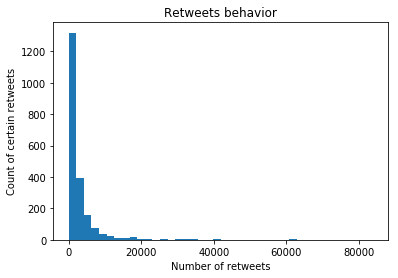

In [103]:
plt.hist(sorted(df_image_prediction_copy.retweet_count, reverse=True), bins=40)
plt.xlabel('Number of retweets')
plt.ylabel('Count of certain retweets')
plt.title('Retweets behavior')
plt.show()

#### Favorite's behavior

In [96]:
df_image_prediction_copy.favorite_count.describe()

count      2075.000000
mean       8424.860723
std       12683.977278
min           0.000000
25%        1624.500000
50%        3715.000000
75%       10524.500000
max      164676.000000
Name: favorite_count, dtype: float64

In [109]:
sorted(df_image_prediction_copy.favorite_count)

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 80.0,
 102.0,
 105.0,
 107.0,
 108.0,
 111.0,
 116.0,
 124.0,
 124.0,
 125.0,
 129.0,
 132.0,
 145.0,
 145.0,
 153.0,
 163.0,
 165.0,
 165.0,
 166.0,
 167.0,
 173.0,
 185.0,
 186.0,
 188.0,
 192.0,
 194.0,
 196.0,
 198.0,
 207.0,
 208.0,
 215.0,
 216.0,
 216.0,
 220.0,
 222.0,
 233.0,
 238.0,
 239.0,
 240.0,
 241.0,
 242.0,
 245.0,
 246.0,
 247.0,
 249.0,
 250.0,
 255.0,
 256.0,
 257.0,
 259.0,
 259.0,
 272.0,
 275.0,
 286.0,
 290.0,
 292.0,
 293.0,
 295.0,
 304.0,
 307.0,
 308.0,
 309.0,
 314.0,
 315.0,
 316.0,
 318.0,
 324.0,
 324.0,
 331.0,
 331.0,
 33

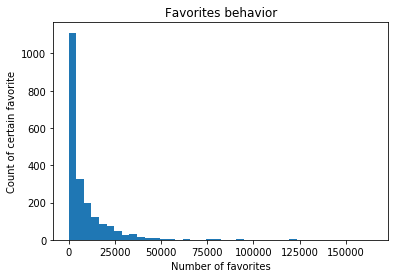

In [104]:
plt.hist(sorted(df_image_prediction_copy.favorite_count, reverse=True), bins=40)
plt.xlabel('Number of favorites')
plt.ylabel('Count of certain favorite')
plt.title('Favorites behavior')
plt.show()

#### Phase's behavior

In [99]:
df_image_prediction_copy.phase.value_counts()

None       1754
pupper      211
doggo        80
puppo        23
floofer       7
Name: phase, dtype: int64

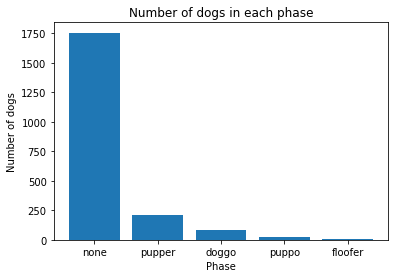

In [106]:
phase_labels = ['none', 'pupper', 'doggo', 'puppo', 'floofer']
phase_values = [1754, 211, 80, 23,7]
plt.bar(phase_labels, phase_values)
plt.xlabel('Phase')
plt.ylabel('Number of dogs')
plt.title('Number of dogs in each phase')
plt.show()

### Exporting data frame to a csv file

In [126]:
df_image_prediction_copy.to_csv('twitter_archive_master.csv')

In [127]:
df_image_prediction_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 19 columns):
tweet_id            2075 non-null int64
jpg_url             2075 non-null object
img_num             2075 non-null category
p1                  2075 non-null category
p1_conf             2075 non-null float64
p1_dog              2075 non-null bool
p2                  2075 non-null category
p2_conf             2075 non-null float64
p2_dog              2075 non-null bool
p3                  2075 non-null category
p3_conf             2075 non-null float64
p3_dog              2075 non-null bool
retweet_count       2075 non-null float64
favorite_count      2075 non-null float64
timestamp           2075 non-null datetime64[ns]
source              2075 non-null object
text                2075 non-null object
rating_numerator    2075 non-null int64
phase               2075 non-null object
dtypes: bool(3), category(4), datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 370.5+